In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [7]:
# --- Synthetic Data  ---
generate_synthetic_geological_data=pd.read_csv(' generate_synthetic_geological_data.csv')

In [8]:
# Generate the data
synthetic_data = pd.read_csv(' generate_synthetic_geological_data.csv')
print("--- Synthetic Geological Data (First 5 rows) ---")
print(synthetic_data.head())

--- Synthetic Geological Data (First 5 rows) ---
   Porosity_v/v  Permeability_mD  Seismic_Velocity_m/s
0      0.109934         0.066067           3488.178016
1      0.097235         0.075572           3467.718164
2      0.112954         0.145302           3478.711442
3      0.130461         0.135688           3415.478907
4      0.095317         0.098960           3544.087083


In [9]:
# --- Unsupervised Learning: K-Means Clustering ---
print("\n--- K-Means Clustering (Unsupervised) ---")
# Select features for clustering
X_cluster = synthetic_data[["Porosity_v/v", "Permeability_mD"]]
# Scale features for K-Means (important for distance-based algorithms)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init to suppress warning
clusters = kmeans.fit_predict(X_cluster_scaled)
synthetic_data["Cluster"] = clusters
print("Cluster assignments (first 10):", clusters[:10])
print("Cluster sizes:\n", synthetic_data["Cluster"].value_counts())



--- K-Means Clustering (Unsupervised) ---
Cluster assignments (first 10): [2 2 2 2 2 2 2 2 2 2]
Cluster sizes:
 Cluster
0    102
2    101
1     97
Name: count, dtype: int64


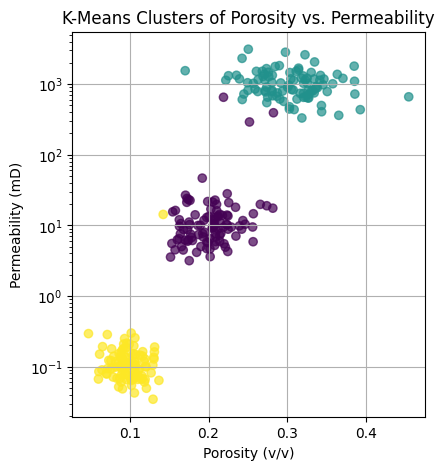

In [11]:
# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(synthetic_data["Porosity_v/v"], synthetic_data["Permeability_mD"],
c=synthetic_data["Cluster"], cmap='viridis', alpha=0.7)
plt.xlabel("Porosity (v/v)")
plt.ylabel("Permeability (mD)")
plt.title("K-Means Clusters of Porosity vs. Permeability")
plt.yscale('log') # Permeability often log-distributed
plt.grid(True)

In [10]:
# --- Supervised Learning: Linear Regression ---
print("\n--- Linear Regression (Supervised) ---")
# Define features (X) and target (y)
X_regress = synthetic_data[["Porosity_v/v"]]
y_regress = synthetic_data["Seismic_Velocity_m/s"]


--- Linear Regression (Supervised) ---


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_regress, y_regress, test_size=0.3,
random_state=42)
# Initialize and train the Linear Regression model
model_regress = LinearRegression()
model_regress.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = model_regress.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Seismic Velocity Prediction: {mse:.2f}")
print(f"Regression Coefficient (Porosity): {model_regress.coef_[0]:.2f}")
print(f"Regression Intercept: {model_regress.intercept_:.2f}")

Mean Squared Error for Seismic Velocity Prediction: 5636.61
Regression Coefficient (Porosity): -4347.10
Regression Intercept: 3905.32


nSaved ML algorithm choices plot to ml_algorithm_choices.png


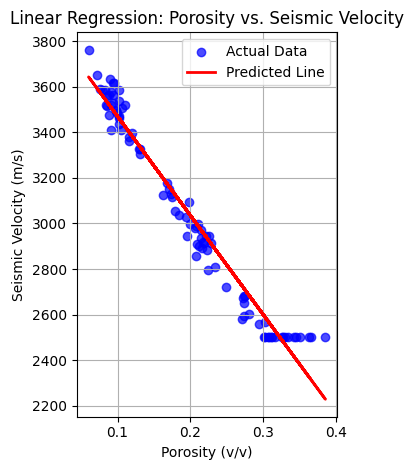

In [14]:
# Visualize regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Porosity (v/v)")
plt.ylabel("Seismic Velocity (m/s)")
plt.title("Linear Regression: Porosity vs. Seismic Velocity")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('ml_algorithm_choices.png')
print("nSaved ML algorithm choices plot to ml_algorithm_choices.png")

### This Python script demonstrates the fundamental difference between unsupervised andsupervised learning using two common algorithms:

## K-Means for clustering and Linear Regression for prediction.

#### K-Means Clustering (Unsupervised):

We use KMeans to group data points based on their Porosity and
Permeability values. The algorithm discovers these groupings without any
prior knowledge of 'correct' clusters.

The results are visualized in a scatter plot, showing how K-Means identifies
distinct clusters, which could represent different rock types or flow units.

#### Linear Regression (Supervised):
We use LinearRegression to predict Seismic_Velocity based on Porosity .
Here, Seismic_Velocity is our labeled target variable.
The data is split into training and testing sets, the model is trained, and its
performance is evaluated using Mean Squared Error. The regression line is
plotted over the actual data points.

#### Critical Takeaway:
Choosing the right ML algorithm isn't about finding a magic bullet; it's about
understanding your data, clearly defining your problem, and knowing whether you're
looking to predict a known outcome (supervised) or discover hidden patterns
(unsupervised). Don't just throw algorithms at your data; critically assess what you're
trying to achieve. The 'black box' becomes a powerful tool when you understand its
inner workings and how to best apply it to your specific geoscience challenges.

